In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

import catboost
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb

In [25]:
df_flights = pd.read_csv('jfk_flights_weather_df.csv')  # Укажите путь к вашему файлу
# df_jfk = df_flights[df_flights['ORIGIN'] == 'JFK']
df_jfk = df_flights.copy()

upper_limit = np.percentile(df_jfk['DEP_DELAY'].dropna(), 95)
df_jfk['DEP_DELAY'] = df_jfk['DEP_DELAY'].clip(upper=upper_limit)

In [26]:
df_flights

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,skyl1,skyl2,skyl3,skyl4,snowdepth,station,tmpf,valid,vsby,wxcodes
0,2019-11-26,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790.0,347.0,JFK,"New York, NY",DFW,"Dallas/Fort Worth, TX",...,25000.00,M,M,M,M,JFK,49.00,2019-11-26 22:51:00,10.00,M
1,2019-12-15,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790.0,430.0,JFK,"New York, NY",SFO,"San Francisco, CA",...,4400.00,7000.00,15000.00,25000.00,M,JFK,49.00,2019-12-15 15:51:00,10.00,M
2,2020-08-07,American Airlines Inc.,American Airlines Inc.: AA,AA,19805.0,76.0,JFK,"New York, NY",SFO,"San Francisco, CA",...,2300.00,6500.00,9500.00,16000.00,M,JFK,70.00,2020-08-07 10:51:00,9.00,M
3,2020-07-05,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790.0,1092.0,JFK,"New York, NY",FLL,"Fort Lauderdale, FL",...,2600.00,25000.00,M,M,M,JFK,73.00,2020-07-05 10:51:00,10.00,M
4,2019-12-04,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790.0,1085.0,JFK,"New York, NY",LAX,"Los Angeles, CA",...,2800.00,4700.00,10000.00,M,M,JFK,37.00,2019-12-04 13:51:00,10.00,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7563,2020-11-22,Endeavor Air Inc.,Endeavor Air Inc.: 9E,9E,20363.0,4984.0,JFK,"New York, NY",ROC,"Rochester, NY",...,1300.00,2500.00,M,M,M,JFK,54.00,2020-11-22 23:51:00,10.00,M
7564,2020-02-03,American Airlines Inc.,American Airlines Inc.: AA,AA,19805.0,117.0,JFK,"New York, NY",LAX,"Los Angeles, CA",...,25000.00,M,M,M,M,JFK,48.00,2020-02-03 23:51:00,10.00,M
7565,2020-03-09,JetBlue Airways,JetBlue Airways: B6,B6,20409.0,1295.0,JFK,"New York, NY",AUS,"Austin, TX",...,10000.00,25000.00,M,M,M,JFK,47.00,2020-03-09 23:51:00,10.00,M
7566,2019-12-30,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790.0,433.0,JFK,"New York, NY",SJU,"San Juan, PR",...,700.00,1000.00,3600.00,M,M,JFK,41.00,2019-12-30 23:51:00,3.00,-DZ


In [27]:
df_jfk

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,skyl1,skyl2,skyl3,skyl4,snowdepth,station,tmpf,valid,vsby,wxcodes
0,2019-11-26,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790.0,347.0,JFK,"New York, NY",DFW,"Dallas/Fort Worth, TX",...,25000.00,M,M,M,M,JFK,49.00,2019-11-26 22:51:00,10.00,M
1,2019-12-15,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790.0,430.0,JFK,"New York, NY",SFO,"San Francisco, CA",...,4400.00,7000.00,15000.00,25000.00,M,JFK,49.00,2019-12-15 15:51:00,10.00,M
2,2020-08-07,American Airlines Inc.,American Airlines Inc.: AA,AA,19805.0,76.0,JFK,"New York, NY",SFO,"San Francisco, CA",...,2300.00,6500.00,9500.00,16000.00,M,JFK,70.00,2020-08-07 10:51:00,9.00,M
3,2020-07-05,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790.0,1092.0,JFK,"New York, NY",FLL,"Fort Lauderdale, FL",...,2600.00,25000.00,M,M,M,JFK,73.00,2020-07-05 10:51:00,10.00,M
4,2019-12-04,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790.0,1085.0,JFK,"New York, NY",LAX,"Los Angeles, CA",...,2800.00,4700.00,10000.00,M,M,JFK,37.00,2019-12-04 13:51:00,10.00,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7563,2020-11-22,Endeavor Air Inc.,Endeavor Air Inc.: 9E,9E,20363.0,4984.0,JFK,"New York, NY",ROC,"Rochester, NY",...,1300.00,2500.00,M,M,M,JFK,54.00,2020-11-22 23:51:00,10.00,M
7564,2020-02-03,American Airlines Inc.,American Airlines Inc.: AA,AA,19805.0,117.0,JFK,"New York, NY",LAX,"Los Angeles, CA",...,25000.00,M,M,M,M,JFK,48.00,2020-02-03 23:51:00,10.00,M
7565,2020-03-09,JetBlue Airways,JetBlue Airways: B6,B6,20409.0,1295.0,JFK,"New York, NY",AUS,"Austin, TX",...,10000.00,25000.00,M,M,M,JFK,47.00,2020-03-09 23:51:00,10.00,M
7566,2019-12-30,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790.0,433.0,JFK,"New York, NY",SJU,"San Juan, PR",...,700.00,1000.00,3600.00,M,M,JFK,41.00,2019-12-30 23:51:00,3.00,-DZ


In [28]:
df_jfk['p01i']

0       0.00
1       0.00
2       0.09
3       0.00
4       0.00
        ... 
7563    0.00
7564    0.00
7565    0.00
7566    0.01
7567    0.00
Name: p01i, Length: 7568, dtype: object

In [29]:
for col in ['CRS_ELAPSED_TIME', 'DISTANCE', 'Month', 'Year', 'alti',
    'dwpf', 'feel', 'gust', 'ice_accretion_1hr', 'ice_accretion_3hr',
    'ice_accretion_6hr', 'inx_danjerous_1', 'inx_danjerous_2',
    'inx_danjerous_3', 'inx_danjerous_4', 'mslp', 'p01i',
    'peak_wind_drct', 'peak_wind_gust', 'relh', 'sknt',
    'skyl1', 'skyl2', 'skyl3', 'skyl4', 'snowdepth', 'tmpf',
    'vsby']:
    try:
        df_jfk[col] = df_jfk[col].apply(lambda x: 0 if x == 'M' else x)
        if col == 'p01i':
            df_jfk[col] = df_jfk[col].apply(lambda x: 0 if x == 'T' else x)
        df_jfk[col] = df_jfk[col].astype(float)
    except Exception as e:
        print(col, e)

In [30]:
df_jfk.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'Month', 'Year', 'Cancelled', 'alti', 'drct',
       'dwpf', 'feel', 'gust', 'ice_accretion_1hr', 'ice_accretion_3hr',
       'ice_accretion_6hr', 'inx_danjerous_1', 'inx_danjerous_2',
       'inx_danjerous_3', 'inx_danjerous_4', 'metar', 'mslp', 'p01i',
       'peak_wind_drct', 'peak_wind_gust', 'peak_wind_time', 'relh', 'sknt',
       'skyc1', 'skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4',
       'snowdepth', 'station', 'tmpf', 'valid', 'vsby', 'wxcode

In [31]:
# Создание новых временных признаков
df_jfk['FL_DATE'] = pd.to_datetime(df_jfk['FL_DATE'])
df_jfk['Month'] = df_jfk['FL_DATE'].dt.month
df_jfk['Day_of_Week'] = df_jfk['FL_DATE'].dt.dayofweek

In [32]:
df_jfk['Month_sin'] = np.sin(2 * np.pi * df_jfk['Month'] / 12)
df_jfk['Month_cos'] = np.cos(2 * np.pi * df_jfk['Month'] / 12)

In [33]:
df_jfk['Day_of_Week_sin'] = np.sin(2 * np.pi * df_jfk['Day_of_Week'] / 7)
df_jfk['Day_of_Week_cos'] = np.cos(2 * np.pi * df_jfk['Day_of_Week'] / 7)

In [34]:
# Преобразуем 'CRS_DEP_TIME' в формат времени
df_jfk['CRS_DEP_TIME'] = pd.to_timedelta(df_jfk['CRS_DEP_TIME'])

# Извлекаем часы из времени
df_jfk['CRS_DEP_HOUR'] = df_jfk['CRS_DEP_TIME'].dt.components.hours + \
                         df_jfk['CRS_DEP_TIME'].dt.components.minutes / 60

# Добавляем сезонные признаки
df_jfk['Hour_sin'] = np.sin(2 * np.pi * df_jfk['CRS_DEP_HOUR'] / 24)
df_jfk['Hour_cos'] = np.cos(2 * np.pi * df_jfk['CRS_DEP_HOUR'] / 24)

# Проверка результата
print(df_jfk[['CRS_DEP_TIME', 'CRS_DEP_HOUR', 'Hour_sin', 'Hour_cos']].head())

     CRS_DEP_TIME  CRS_DEP_HOUR  Hour_sin  Hour_cos
0 0 days 18:20:00     18.333333 -0.996195  0.087156
1 0 days 11:25:00     11.416667  0.152123 -0.988362
2 0 days 07:07:00      7.116667  0.957571 -0.288196
3 0 days 07:15:00      7.250000  0.946930 -0.321439
4 0 days 09:45:00      9.750000  0.555570 -0.831470


In [36]:
features = ['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
            'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
            'CRS_DEP_TIME', 'CRS_ARR_TIME',
            'CRS_ELAPSED_TIME',
            'DISTANCE',
            'Month', 'Year', 'alti',
            'dwpf', 'feel', 'gust', 'ice_accretion_1hr', 'ice_accretion_3hr',
            'ice_accretion_6hr', 'inx_danjerous_1', 'inx_danjerous_2',
            'inx_danjerous_3', 'inx_danjerous_4', 'mslp', 'p01i',
            'peak_wind_drct', 'peak_wind_gust', 'relh', 'sknt',
            'skyc1', 'skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4',
            'snowdepth', 'tmpf', 'vsby', 'wxcodes',
            'Day_of_Week', 'Month_sin', 'Month_cos',
            'Day_of_Week_sin', 'Day_of_Week_cos',
            'Hour_sin', 'Hour_cos']
X = df_jfk[features]
y = df_jfk['DEP_DELAY']

In [1]:
len(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
     'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
     'CRS_DEP_TIME', 'CRS_ARR_TIME',
     'CRS_ELAPSED_TIME',
     'DISTANCE',
     'Month', 'Year', 'alti',
     'dwpf', 'feel', 'gust', 'ice_accretion_1hr', 'ice_accretion_3hr',
     'ice_accretion_6hr', 'inx_danjerous_1', 'inx_danjerous_2',
     'inx_danjerous_3', 'inx_danjerous_4', 'mslp', 'p01i',
     'peak_wind_drct', 'peak_wind_gust', 'relh', 'sknt',
     'skyc1', 'skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4',
     'snowdepth', 'tmpf', 'vsby', 'wxcodes',
     'Day_of_Week', 'Month_sin', 'Month_cos',
     'Day_of_Week_sin', 'Day_of_Week_cos',
     'Hour_sin', 'Hour_cos'])

52

In [37]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Кодирование категориальных признаков и масштабирование числовых
categorical_features = [
    'FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
    'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
    'CRS_DEP_TIME', 'CRS_ARR_TIME', 'skyc1', 'skyc2', 'skyc3', 'skyc4',
    'wxcodes', 'Day_of_Week'
]
numerical_features = [
    'CRS_ELAPSED_TIME', 'DISTANCE', 'Month', 'Year', 'alti',
    'dwpf', 'feel', 'gust', 'ice_accretion_1hr', 'ice_accretion_3hr',
    'ice_accretion_6hr', 'inx_danjerous_1', 'inx_danjerous_2',
    'inx_danjerous_3', 'inx_danjerous_4', 'mslp', 'p01i',
    'peak_wind_drct', 'peak_wind_gust', 'relh', 'sknt',
    'skyl1', 'skyl2', 'skyl3', 'skyl4', 'snowdepth', 'tmpf',
    'vsby', 'Month_sin', 'Month_cos',
    'Day_of_Week_sin', 'Day_of_Week_cos',
    'Hour_sin', 'Hour_cos'
]

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [43]:
# Обучение моделей
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor (SVR)': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators = 1000, learning_rate = 0.1, random_state=42)
}

In [44]:
# Результаты моделей
results = {}
for name, model in models.items():
    # Построение пайплайна
    from sklearn.pipeline import Pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Обучение модели
    pipeline.fit(X_train, y_train)

    # Предсказания
    y_pred = pipeline.predict(X_test)

    # Метрики
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

C:\Users\Mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared'

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3720
[LightGBM] [Info] Number of data points in the train set: 6054, number of used features: 469
[LightGBM] [Info] Start training from score 0.252395


C:\Users\Mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


                                      MAE       RMSE        R2
Linear Regression               13.313185  19.491150 -0.666127
Random Forest                    8.958468  14.490583  0.079116
Gradient Boosting                9.042979  14.202931  0.115314
Support Vector Regressor (SVR)   8.296766  15.550231 -0.060490
CatBoost                         8.935106  14.041192  0.135349
LightGBM                         9.067888  14.123833  0.125141
XGBoost                          8.959336  14.267394  0.107265


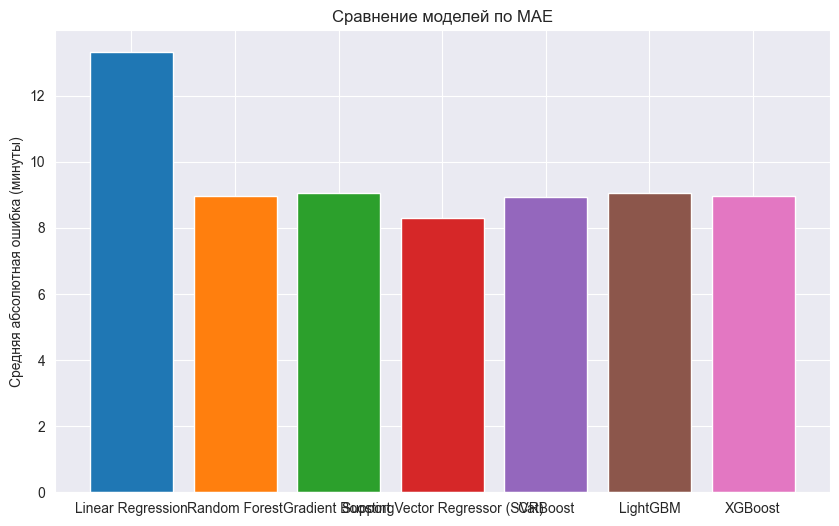

In [42]:
# Вывод результатов
results_df = pd.DataFrame(results).T
print(results_df)

# Визуализация результатов
plt.figure(figsize=(10, 6))
for name in results:
    plt.bar(name, results[name]['MAE'], label=f"{name} (MAE)")
plt.title("Сравнение моделей по MAE")
plt.ylabel("Средняя абсолютная ошибка (минуты)")
plt.show()